# Import Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Load the Dataset

In [60]:
df = pd.read_csv("netflix_titles_2021.csv") 

In [17]:
df.head() 

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water    Rajiv Chilaka   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans    Rajiv Chilaka   
4      s5  TV Show           Kota Factory    Rajiv Chilaka   

                                                cast        country  \
0                                 David Attenborough  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                 David Attenborough  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [8]:
df.isnull().sum()
df.fillna(df.mode().iloc[0], inplace=True)


# Data Understanding


In [9]:
df.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
df.describe()


release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [12]:
df.describe(include="object") 


show_id   type                 title       director  \
count     8807   8807                  8807           8807   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1           2653   

                      cast        country       date_added rating  duration  \
count                 8807           8807             8807   8807      8807   
unique                7692            748             1714     17       220   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                   844           3649              120   3211      1796   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

# Data Exploration and Visualization

# Distribution of Release Years of Netflix Content

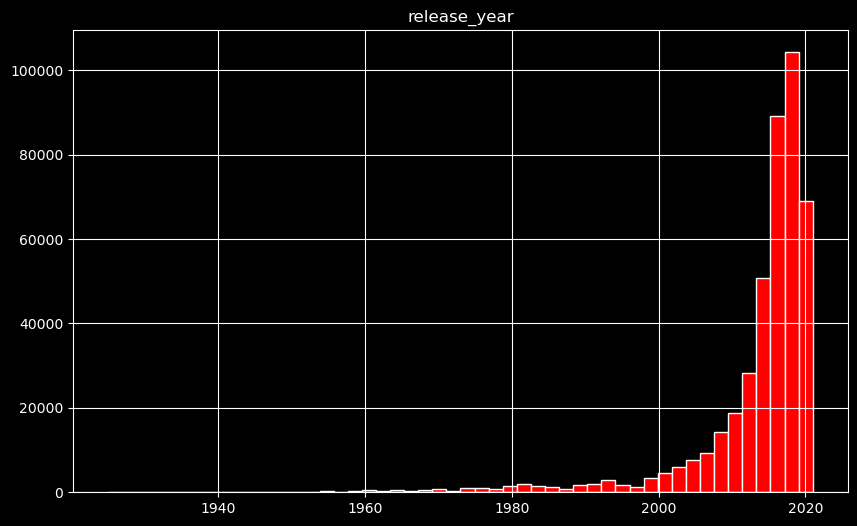

In [105]:
df[['release_year']].hist(figsize=(10, 6), bins=50, color="red", edgecolor="white")  
plt.show()


 ## Categorical Features(Content Type Distribution - Movies vs. TV Shows)

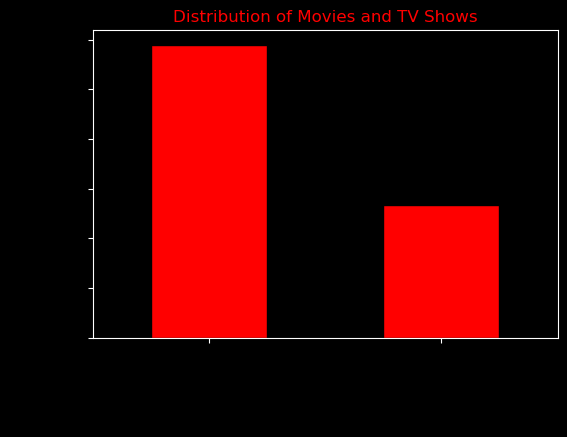

In [101]:
df["type"].value_counts().plot(kind="bar", color="red", edgecolor="black", figsize=(6, 4))
plt.xlabel("Content Type", color="black")
plt.ylabel("Count", color="black")
plt.title("Distribution of Movies and TV Shows", color="red")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

# Country Distribution

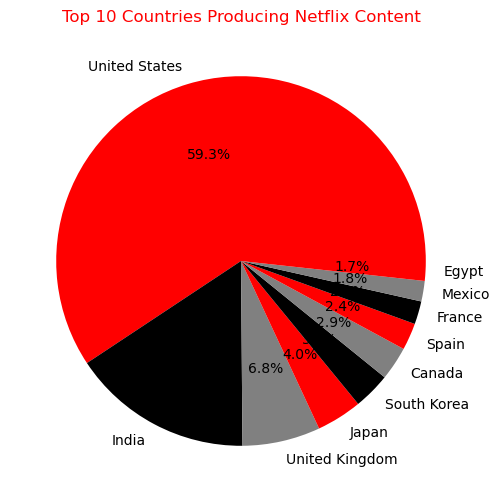

In [52]:
df["country"].value_counts().head(10).plot(kind="pie", autopct="%1.1f%%", colors=["red", "black", "gray"], figsize=(6, 6))
plt.title("Top 10 Countries Producing Netflix Content", color="red")
plt.ylabel("")  
plt.show()

# Distribution of Release Years Across Netflix Content Types

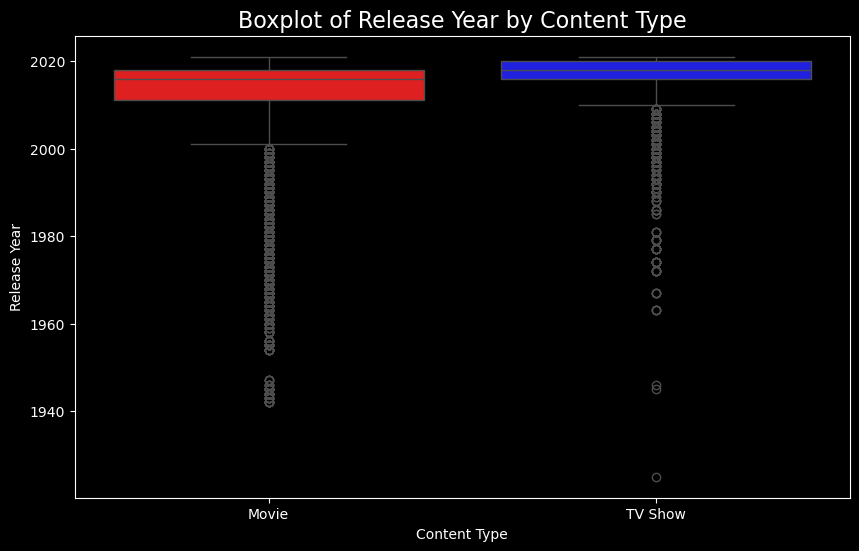

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=df, hue='type', palette=["red", "blue"], legend=False)
plt.title('Boxplot of Release Year by Content Type', fontsize=16)
plt.xlabel('Content Type')
plt.ylabel('Release Year')
plt.show()

# Trend of Content Duration Over the Years on Netflix

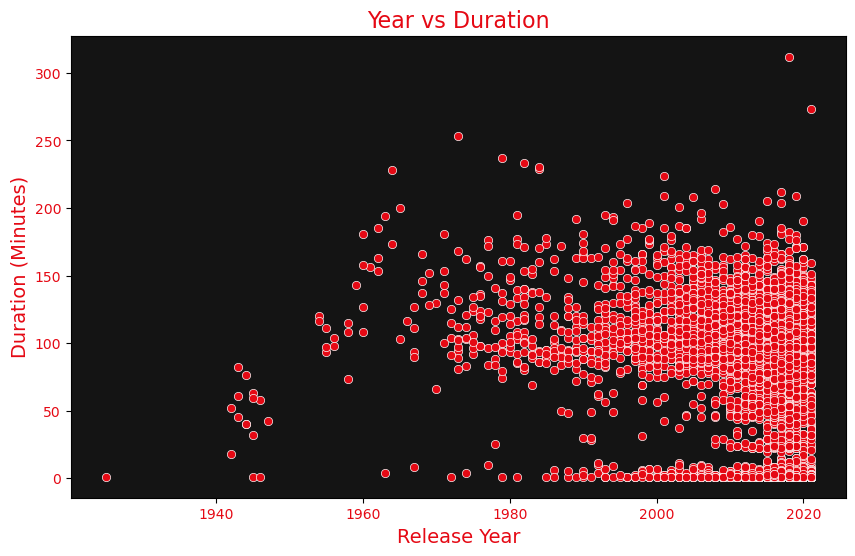

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["release_year"], y=df["duration"], color="#E50914")  
plt.xlabel("Release Year", fontsize=14, color="#E50914")
plt.ylabel("Duration (Minutes)", fontsize=14, color="#E50914")
plt.title("Year vs Duration", fontsize=16, color="#E50914")
plt.xticks(color="#E50914")
plt.yticks(color="#E50914")
plt.gca().set_facecolor("#141414")  
plt.show()


# Proportion of Netflix Movies vs. TV Shows

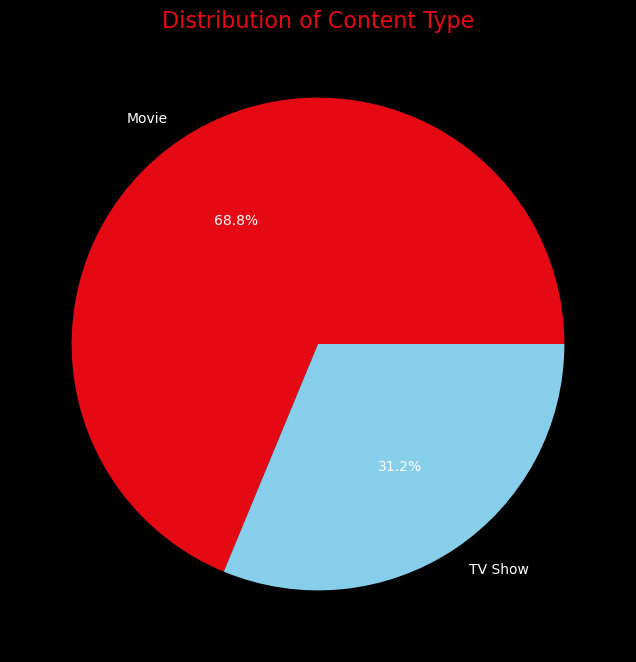

In [106]:
plt.figure(figsize=(8, 8))
df["type"].value_counts().plot(kind="pie", colors=["#E50914", "skyblue"], autopct="%1.1f%%")
plt.title("Distribution of Content Type", fontsize=16, color="#E50914")
plt.ylabel("")  # Hide y-label
plt.show()

# Pairplot (Multi-Variable Relationships)

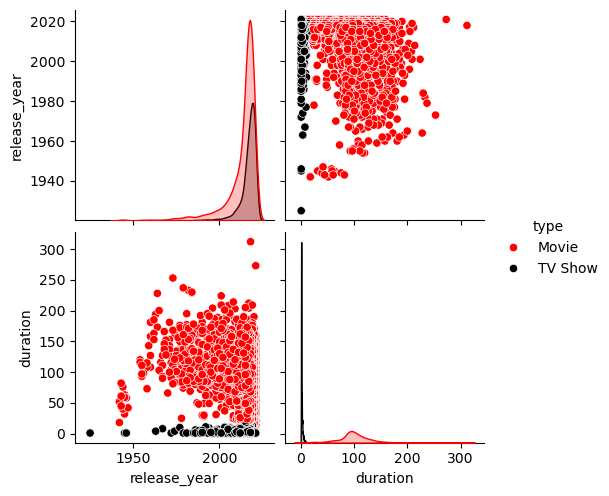

In [61]:
sns.pairplot(df, hue="type", palette={"Movie": "red", "TV Show": "black"})
plt.show()


# Heatmap (Correlation Matrix)

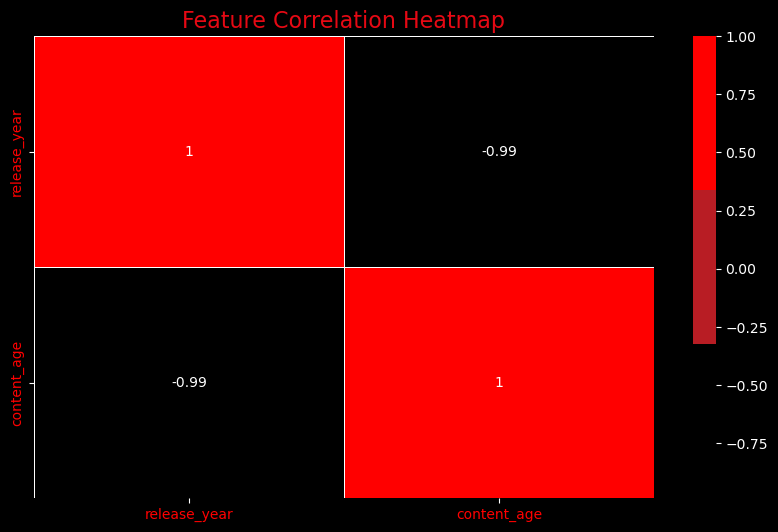

In [70]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap=["black", "#B81D24", "red"], linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16, color="#E50914")
plt.xticks(color="red")
plt.yticks(color="red")

plt.show()


# Analysis of Growth in Movies and TV Shows Over the Years

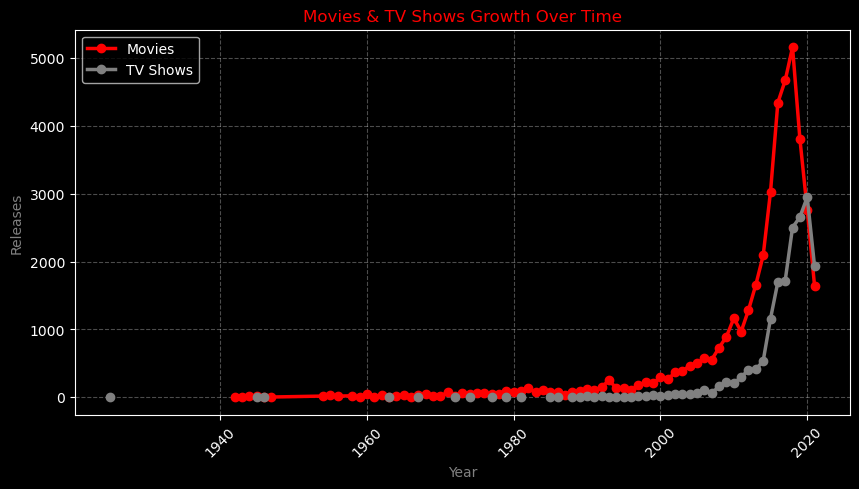

In [72]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

content_trend = df.groupby(['release_year', 'type']).size().unstack()

plt.style.use("dark_background")

content_trend.plot(figsize=(10,5), marker="o", linewidth=2.5, color=["red", "gray"])
plt.title("Movies & TV Shows Growth Over Time", color="red")
plt.xlabel("Year", color="gray")
plt.ylabel("Releases", color="gray")
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle="--")
plt.legend(["Movies", "TV Shows"])
plt.show()

# Distribution of Genres in Movies and TV Shows

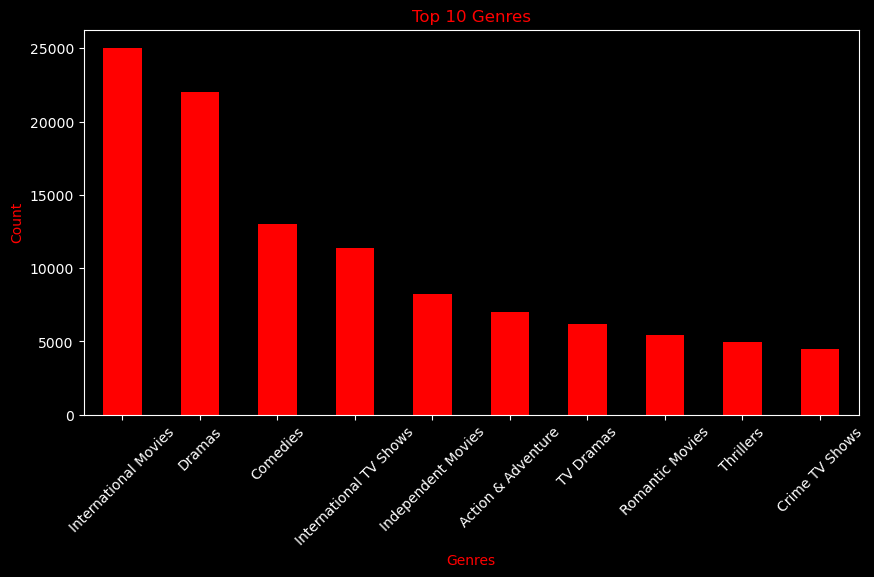

In [73]:
plt.figure(figsize=(10,5))
genre_counts = df['listed_in'].str.split(', ').explode().value_counts().head(10)

genre_counts.plot(kind="bar", color="red")
plt.title("Top 10 Genres", color="red")
plt.xlabel("Genres", color="red")
plt.ylabel("Count", color="red")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("black")

plt.show()


# distribution of content across different countries

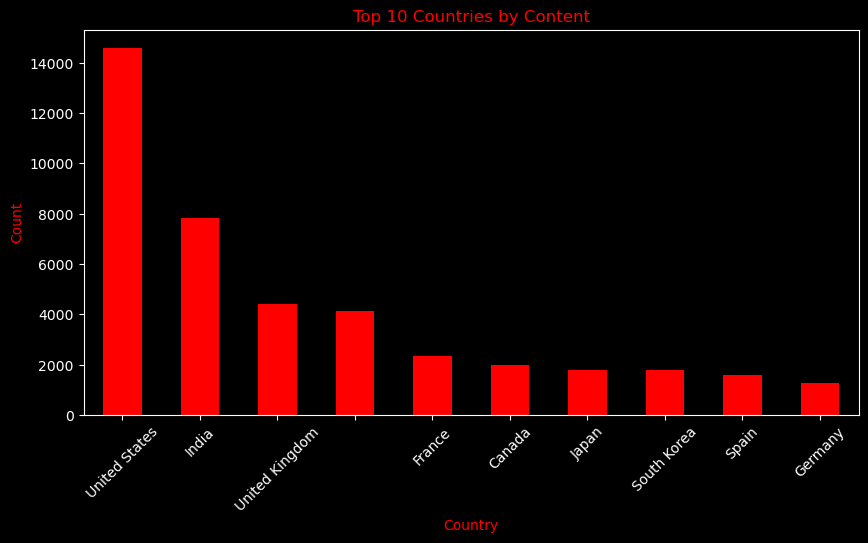

In [74]:
plt.figure(figsize=(10,5))

country_counts = df['country'].str.split(', ').explode().value_counts().head(10)
country_counts.plot(kind="bar", color="red")
plt.title("Top 10 Countries by Content", color="red")
plt.xlabel("Country", color="red")
plt.ylabel("Count", color="red")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("black")

plt.show()


# distribution of duration for both Movies and TV Shows

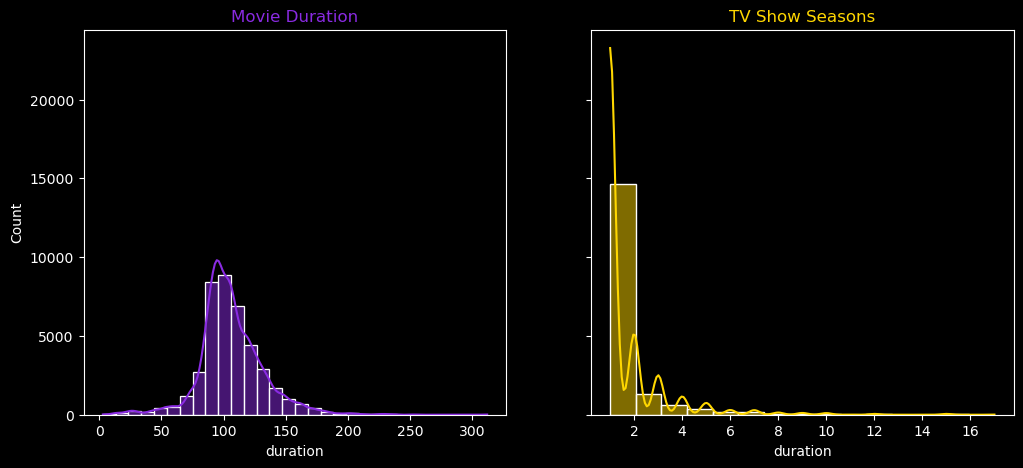

In [75]:
movies = df[df["type"] == "Movie"].copy()
tv_shows = df[df["type"] == "TV Show"].copy()

movies["duration"] = movies["duration"].str.replace(" min", "").astype(float)
tv_shows["duration"] = tv_shows["duration"].str.replace(" Season", "").str.replace("s", "").astype(float)

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(movies["duration"], bins=30, color="blueviolet", kde=True, ax=ax[0])
ax[0].set_title("Movie Duration", color="blueviolet")

sns.histplot(tv_shows["duration"], bins=15, color="gold", kde=True, ax=ax[1])
ax[1].set_title("TV Show Seasons", color="gold")

plt.show()


# Distribution of Content Across Rating Categories

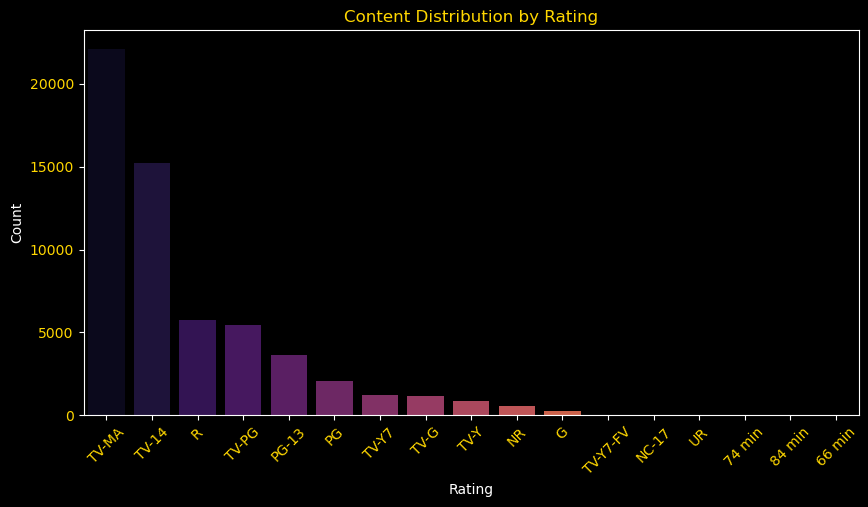

In [77]:
rating_counts = df["rating"].value_counts().reset_index()
rating_counts.columns = ["Rating", "Count"]

plt.figure(figsize=(10, 5))
sns.barplot(data=rating_counts, x="Rating", y="Count", hue="Rating", dodge=False, palette="inferno", legend=False)

plt.title("Content Distribution by Rating", color="gold")
plt.xticks(rotation=45, color="gold")
plt.yticks(color="gold")
plt.gca().set_facecolor("black")

plt.show()



# Number of Titles Released Over the Years


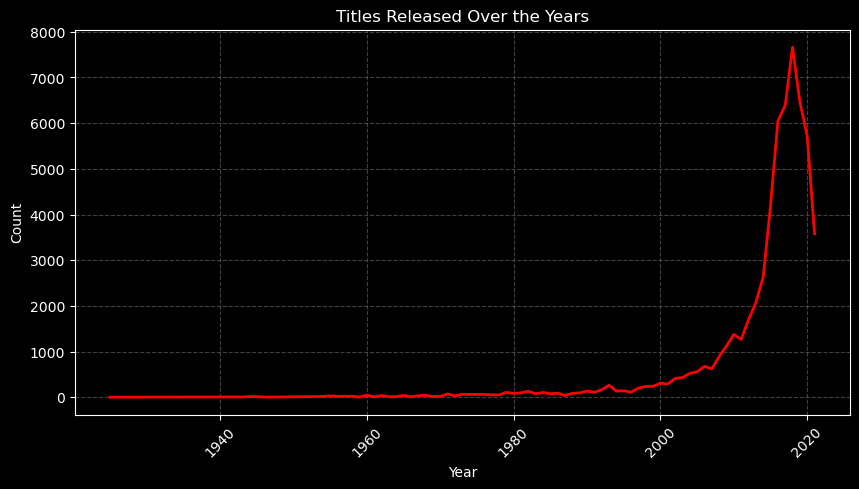

In [78]:
release_counts = df["release_year"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=release_counts.index, y=release_counts.values, color="red", linewidth=2)
plt.title("Titles Released Over the Years", color="white")
plt.xlabel("Year", color="white")
plt.ylabel("Count", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("black")
plt.grid(alpha=0.5, linestyle="--", color="gray")
plt.show()




# Content Added to Netflix by Month

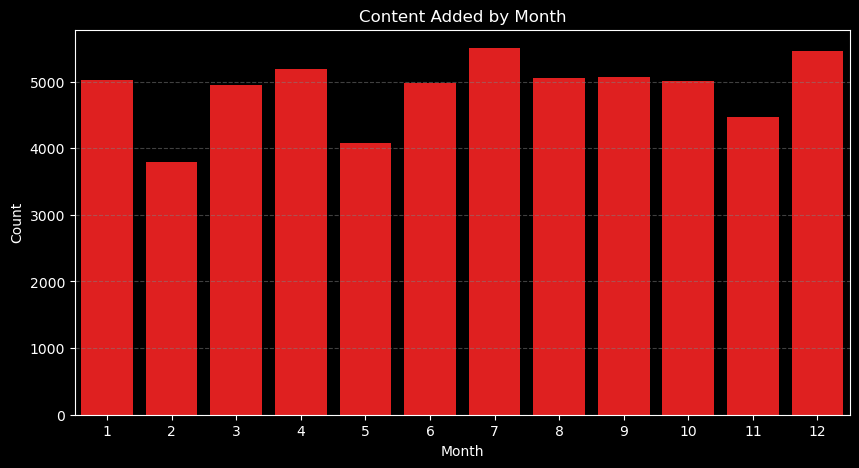

In [79]:
df['month_added'] = pd.to_datetime(df['date_added']).dt.month

plt.figure(figsize=(10, 5), facecolor="black")
sns.countplot(x='month_added', data=df, color='red')
plt.title('Content Added by Month', color="white")
plt.xlabel('Month', color="white")
plt.ylabel('Count', color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

plt.show()


# Top 10 Most Frequent Director

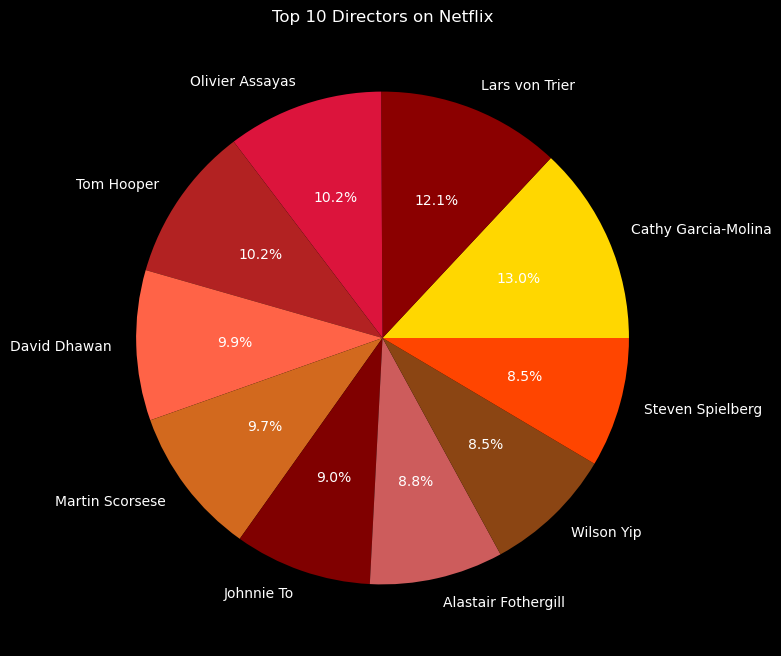

In [82]:
directors = df['director'].value_counts().iloc[1:11]

plt.figure(figsize=(8, 8), facecolor="black")
plt.pie(directors, labels=directors.index, autopct='%1.1f%%', colors=["gold", "darkred", "crimson", "firebrick", "tomato",
                                                                      "chocolate", "maroon", "indianred", "saddlebrown", "orangered"], 
        textprops={'color': "white"})

plt.title("Top 10 Directors on Netflix", color="white")
plt.show()


# Top 10 Most Featured Actors on Netflix

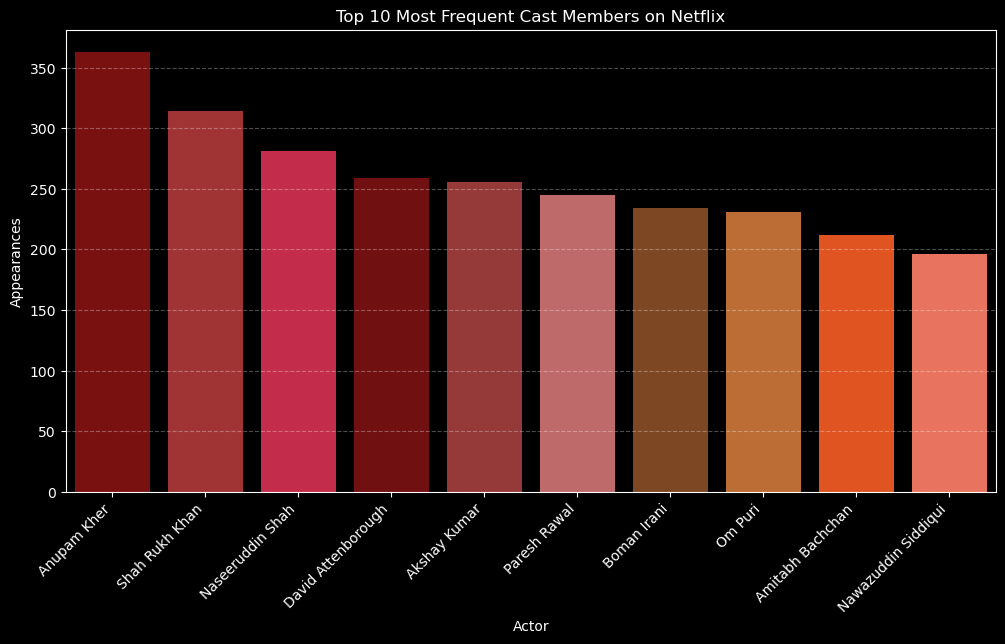

In [84]:
actors = df['cast'].str.split(', ').explode().value_counts().nlargest(10).reset_index()
actors.columns = ['Actor', 'Count']

plt.figure(figsize=(12, 6), facecolor="black")
sns.barplot(data=actors, x="Actor", y="Count", hue="Actor", palette=["darkred", "firebrick", "crimson", "maroon", 
                                                                    "brown", "indianred", "saddlebrown", "chocolate", 
                                                                    "orangered", "tomato"], legend=False)

plt.title("Top 10 Most Frequent Cast Members on Netflix", color="white")
plt.xlabel("Actor", color="white")
plt.ylabel("Appearances", color="white")
plt.xticks(rotation=45, ha='right', color="white")
plt.yticks(color="white")
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.show()


# Evolution of Genre Popularity on Netflix Over the Years

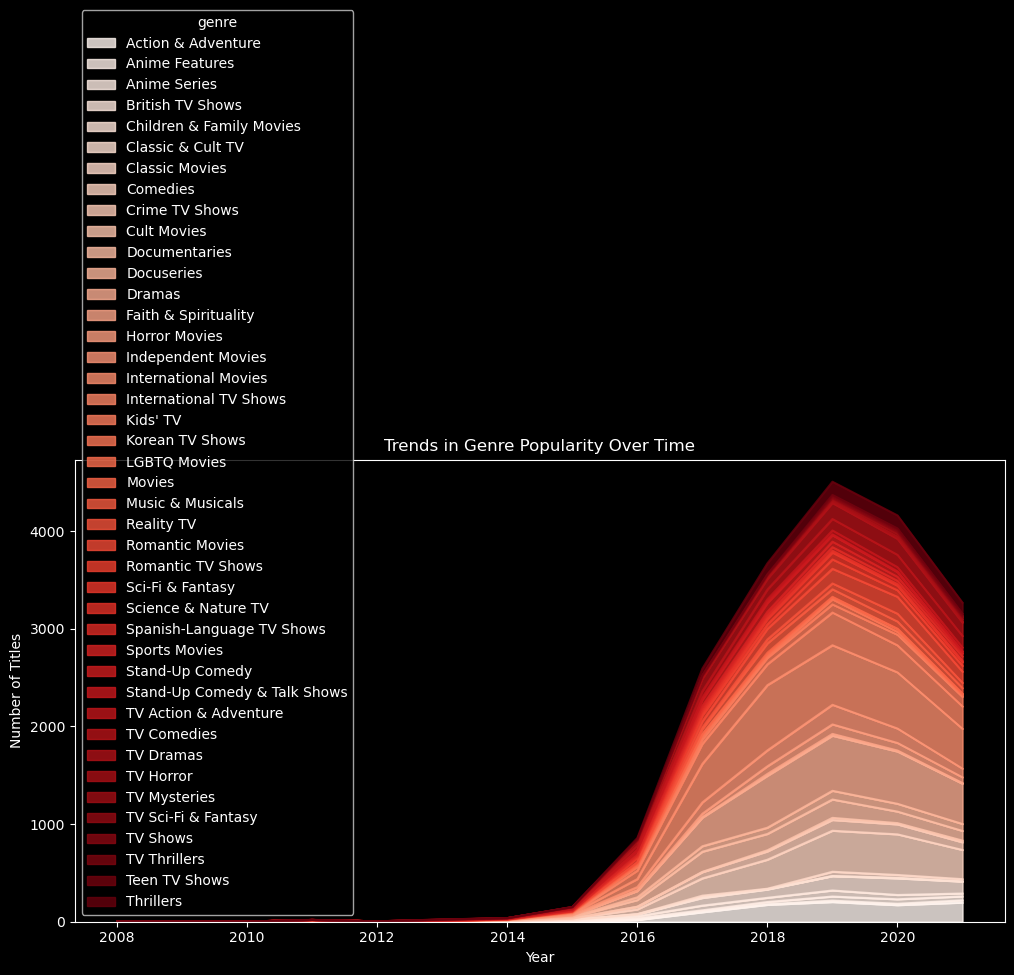

In [42]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
df_exploded = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
genre_trends = df_exploded.groupby(['year_added', 'genre']).size().unstack().fillna(0)

genre_trends.plot(kind='area', stacked=True, colormap='Reds', figsize=(12, 6), alpha=0.8)
plt.title('Trends in Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


# Plotting the relationship between countries and content ratings

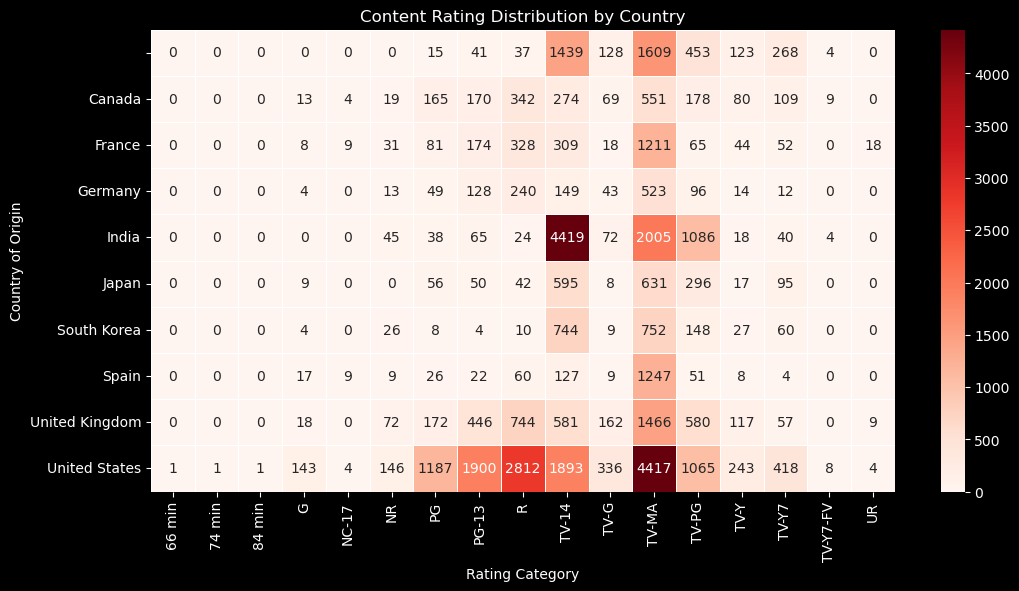

In [94]:
df_filtered = df[df['country'].isin(df['country'].value_counts().head(10).index)]
rating_country_pivot = df_filtered.pivot_table(index='country', columns='rating', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(rating_country_pivot, cmap='Reds', annot=True, fmt='d', linewidths=0.5)

plt.title('Content Rating Distribution by Country')
plt.xlabel('Rating Category')
plt.ylabel('Country of Origin')
plt.show()

 # explore the association between directors and genres

<Figure size 1200x600 with 0 Axes>

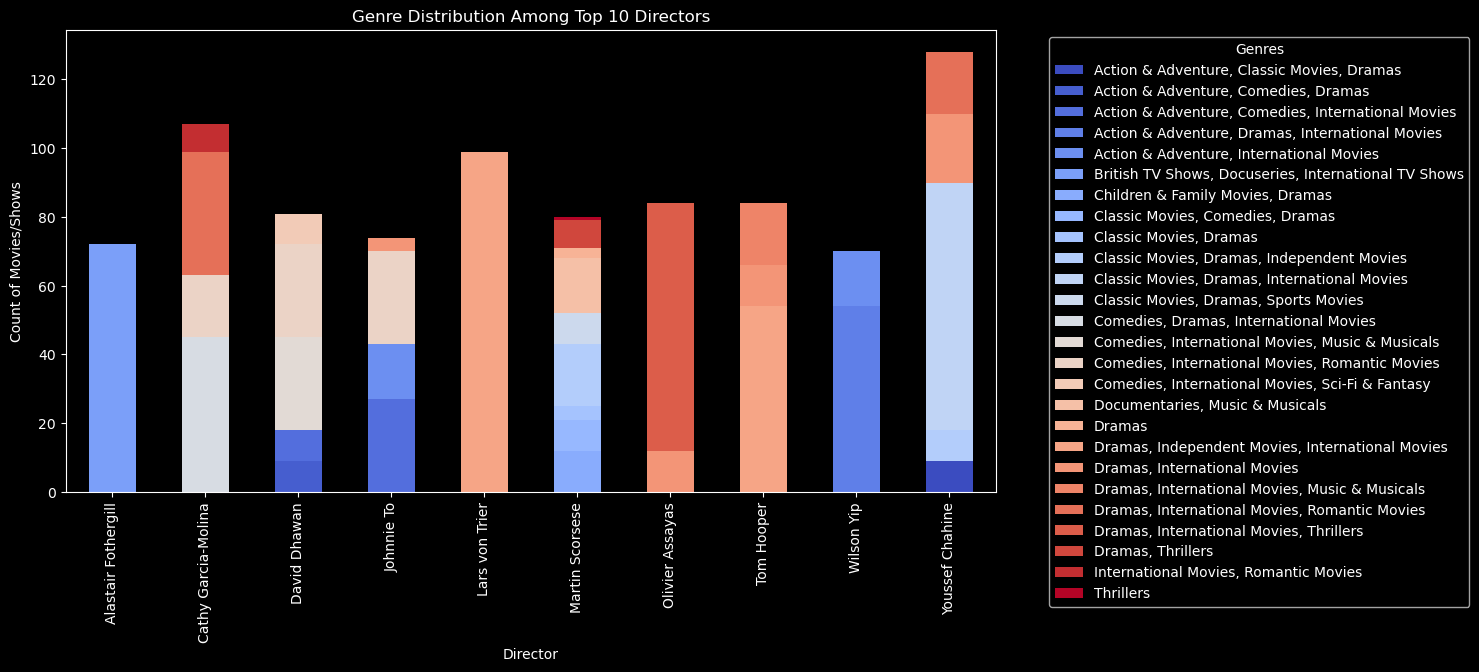

In [95]:
top_directors = df['director'].value_counts().head(10).index
df_filtered = df[df['director'].isin(top_directors)]

genre_director_pivot = df_filtered.pivot_table(index='director', columns='listed_in', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
genre_director_pivot.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))

plt.title('Genre Distribution Among Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count of Movies/Shows')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 # analyze cast members genre preferences

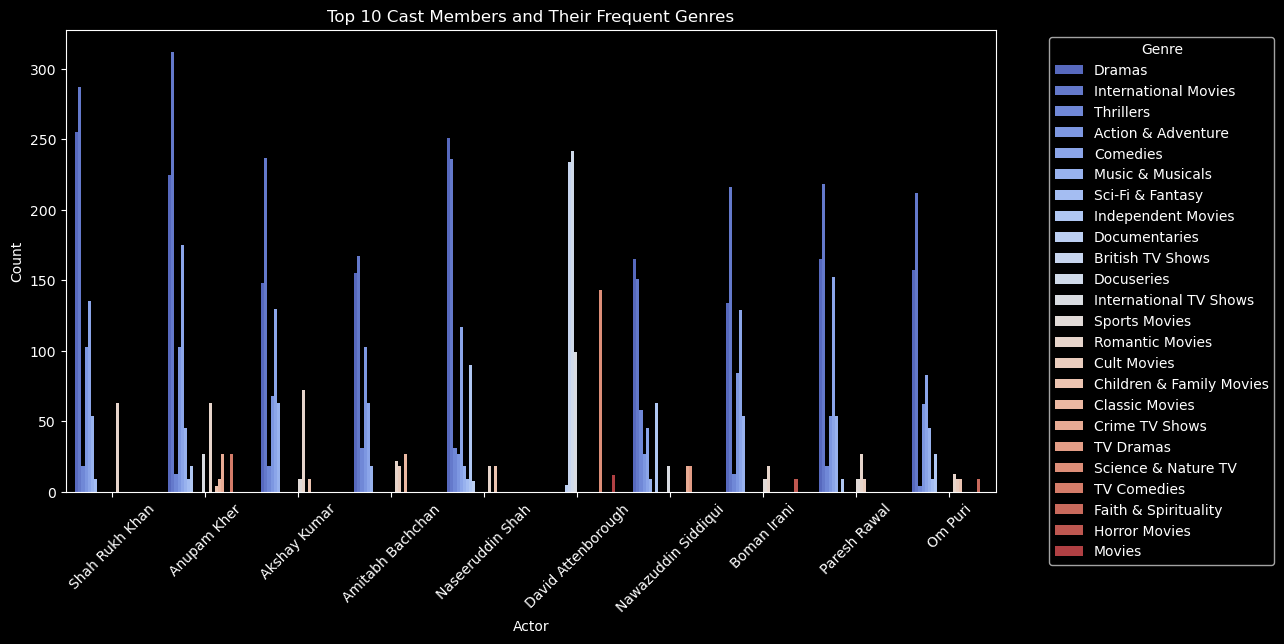

In [96]:
df_exploded = df[['cast', 'listed_in']].dropna()
df_exploded['cast'] = df_exploded['cast'].str.split(', ')
df_exploded['listed_in'] = df_exploded['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('cast').explode('listed_in')

top_actors = df_exploded['cast'].value_counts().head(10).index
df_top_actors = df_exploded[df_exploded['cast'].isin(top_actors)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_actors, x='cast', hue='listed_in', palette='coolwarm')

plt.title('Top 10 Cast Members and Their Frequent Genres')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# analyze how frequently certain words appear in different decades

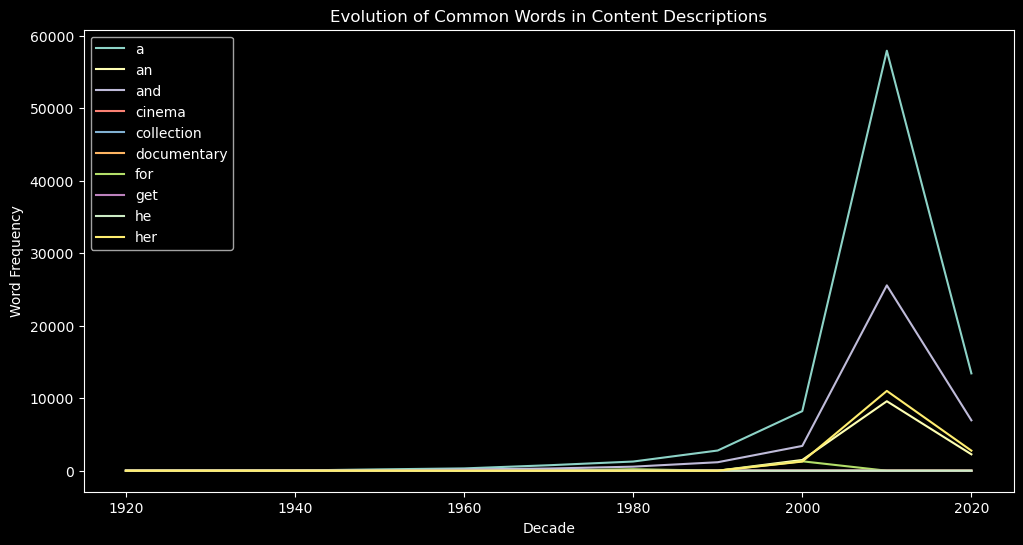

In [97]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['decade'] = (df['release_year'] // 10) * 10
df = df.dropna(subset=['description'])
def word_count(text):
    return text.lower().split()
word_freq = {}
for decade in sorted(df['decade'].dropna().unique()):
    words = word_count(" ".join(df[df['decade'] == decade]['description']))
    word_freq[decade] = pd.Series(words).value_counts().head(10)

df_words = pd.DataFrame(word_freq).fillna(0)

plt.figure(figsize=(12, 6))
for word in df_words.index[:10]:  
    plt.plot(df_words.columns, df_words.loc[word], label=word)

plt.xlabel("Decade")
plt.ylabel("Word Frequency")
plt.title("Evolution of Common Words in Content Descriptions")
plt.legend()
plt.show()


# Netflix Originals vs Licensed Conten

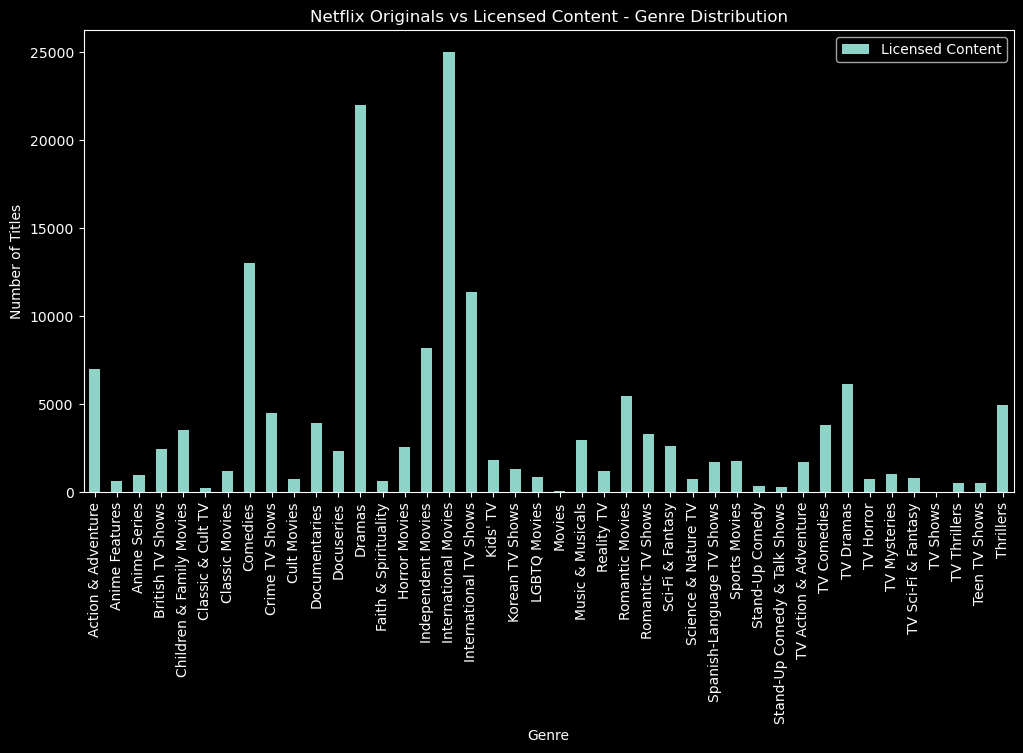

In [98]:
df['is_netflix_original'] = df['country'].fillna('').apply(lambda x: 'Netflix' in x)

df['listed_in'] = df['listed_in'].fillna('')
df = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

genre_counts = df.groupby(['is_netflix_original', 'genre'])['title'].count().unstack(0, fill_value=0)

genre_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Netflix Originals vs Licensed Content - Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=90)
plt.legend(["Licensed Content", "Netflix Originals"])
plt.show()


# diversity of Netflix content has changed over time

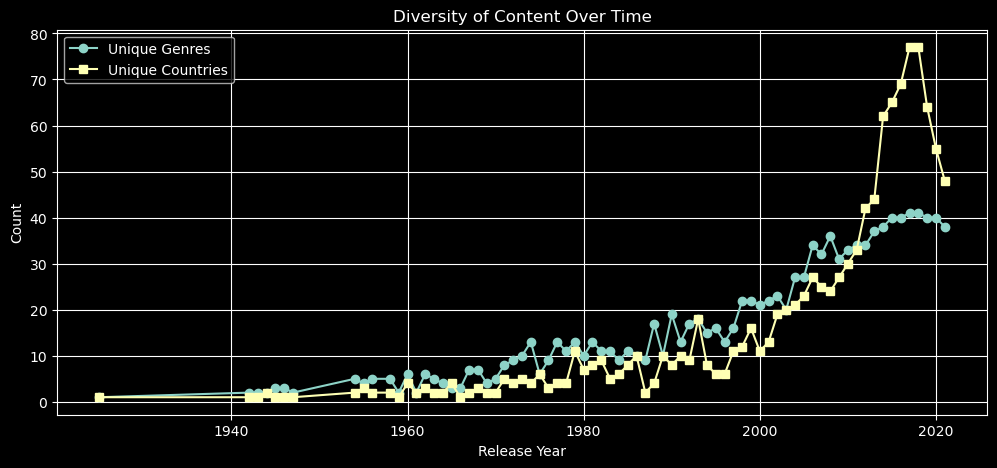

In [99]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

df['listed_in'] = df['listed_in'].fillna('').str.split(', ')
df = df.explode('listed_in')

genre_diversity = df.groupby('release_year')['listed_in'].nunique()

df['country'] = df['country'].fillna('').str.split(', ')
df = df.explode('country')

country_diversity = df.groupby('release_year')['country'].nunique()

plt.figure(figsize=(12, 5))
plt.plot(genre_diversity, marker='o', label="Unique Genres")
plt.plot(country_diversity, marker='s', label="Unique Countries")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Diversity of Content Over Time")
plt.legend()
plt.grid()
plt.show()


# correlation between the age of content (release year) and its relevance using the date_added field

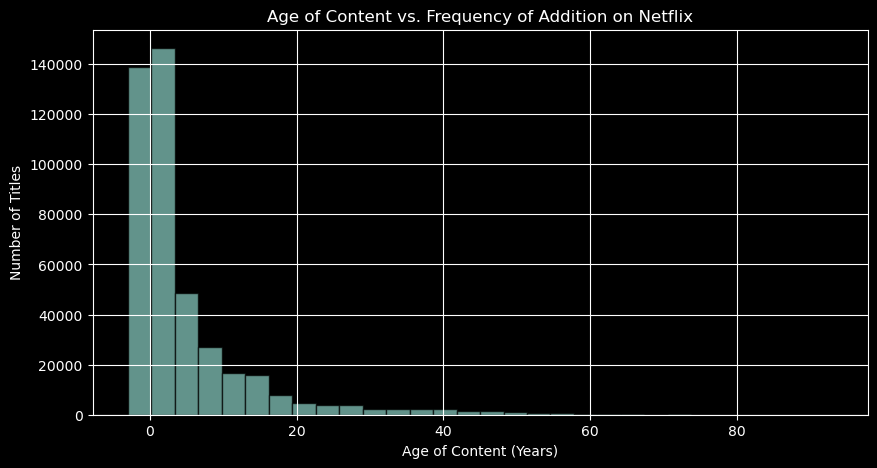

In [100]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['content_age'] = df['date_added'].dt.year - df['release_year']
df = df.dropna(subset=['content_age'])

plt.figure(figsize=(10, 5))
plt.hist(df['content_age'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Age of Content (Years)")
plt.ylabel("Number of Titles")
plt.title("Age of Content vs. Frequency of Addition on Netflix")
plt.grid()
plt.show()
